In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[[  0   0   0 ...  17  15  13]
 [  4   2  20 ...  14  12  11]
 [  2  10   2 ...   9  10  10]
 ...
 [174 174 175 ... 188 188 188]
 [174 174 175 ... 193 193 193]
 [174 174 175 ... 185 185 185]]


array([[  0,   0,   0, ...,  17,  15,  13],
       [  4,   2,  20, ...,  14,  12,  11],
       [  2,  10,   2, ...,   9,  10,  10],
       ...,
       [174, 174, 175, ..., 188, 188, 188],
       [174, 174, 175, ..., 193, 193, 193],
       [174, 174, 175, ..., 185, 185, 185]], dtype=uint8)
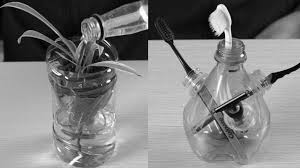

In [2]:
# Load image in grayscale
img = cv2.imread('/content/imageconth.jpg', 0)
print(img)
img

# Transformasi Logaritmik

Meningkatkan intensitas yang rendah

## **Formula:**
$$
s = c \cdot \log(1 + r)
$$
where:
- \( s \) is the output pixel intensity,
- \( r \) is the input pixel intensity,
- \( c \) is a scaling constant to normalize the output range,
- \( log(1 + r) \) ensures that even \( r = 0 \) gives a valid output.

In [3]:
# Apply logarithmic transformation
c = 255 / np.log(1 + np.max(img))  # Normalization constant
log_transformed = c * np.log(1 + img.astype(np.float64))

# Convert back to 8-bit format
log_transformed = np.array(log_transformed, dtype=np.uint8)

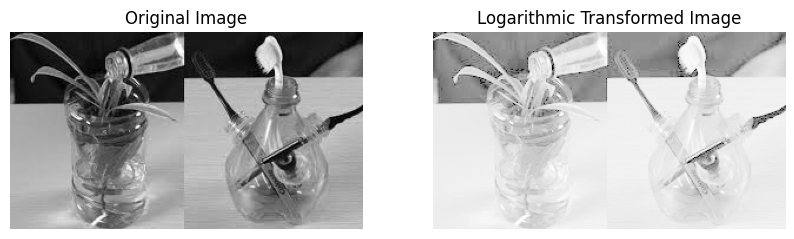

In [4]:
# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transformed Image")
plt.axis('off')

plt.show()

# Exponential Transformation


The exponential transformation is a non-linear point operation used in image processing to enhance contrast, particularly in dark regions of an image. The general mathematical form is:

$$s = c \cdot (e^r - 1)$$

where:
- $s$ is the output pixel intensity
- $r$ is the input pixel intensity (normalized to [0,1])
- $c$ is a scaling constant to normalize the output range
- $e$ is Euler's number (approximately 2.718)


In [5]:
# normalize imgae convert to (range 1 - 0)
img2_normalized = img /225.0

# Apply exponential transformation

# Adjust this for differnet effect
c = 1.0
exp_transformed = c * (np.exp(img2_normalized) - 1)

# Scale back to range 0 - 255
exp_transformed = np.clip(exp_transformed * 255, 0, 255).astype(np.uint8)

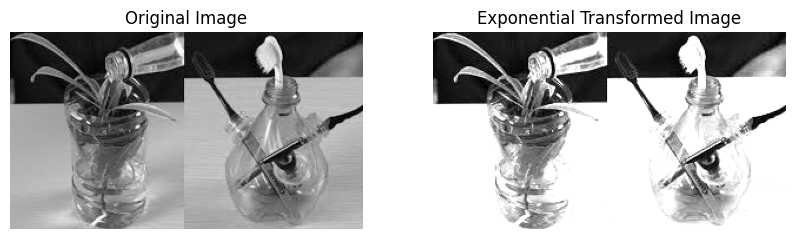

In [6]:
# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(exp_transformed, cmap='gray')
plt.title("Exponential Transformed Image")
plt.axis('off')

plt.show()

# Transformation Negative

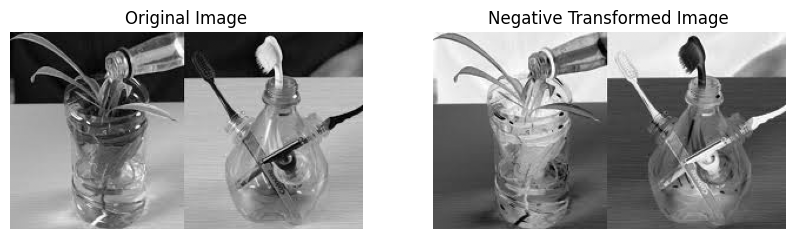

In [7]:
image_neg = 255 - img

# Display original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_neg, cmap='gray')
plt.title("Negative Transformed Image")
plt.axis('off')

plt.show()

# Gamma Transformation

In [8]:
# Apply gamma correction
gamma = 5
gamma_corrected_5 = np.power(img2_normalized, gamma)

# scale back to range (0 - 255)
gamma_corrected_5 = np.clip(gamma_corrected_5 * 255, 0, 255).astype(np.uint8)

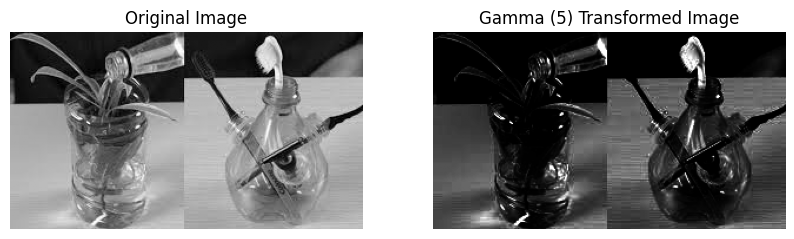

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_5, cmap='gray')
plt.title("Gamma (5) Transformed Image")
plt.axis('off')

plt.show()

In [10]:
# Apply gamma correction
gamma = 0.5
gamma_corrected_0_point_5 = np.power(img2_normalized, gamma)

# scale back to range (0 - 255)
gamma_corrected_0_point_5 = np.clip(gamma_corrected_0_point_5 * 255, 0, 255).astype(np.uint8)

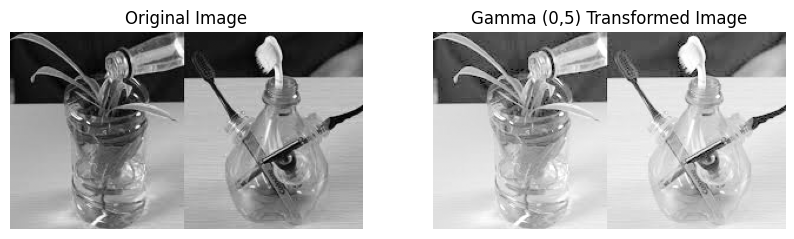

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_0_point_5, cmap='gray')
plt.title("Gamma (0,5) Transformed Image")
plt.axis('off')

plt.show()

# Contrast Streching

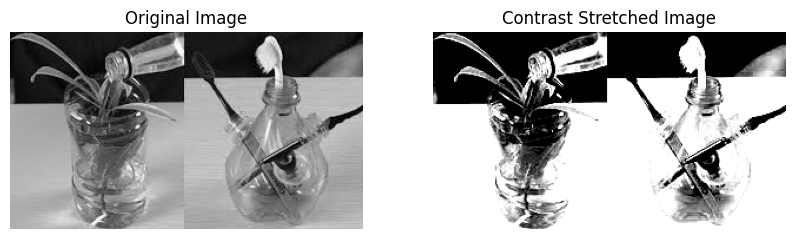

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img5 = cv2.imread('/content/imageconth.jpg', 0)

# Define control points (example)
r1, s1 = 70, 0    # Titik pertama (input, output)
r2, s2 = 150, 255  # Titik kedua (input, output)

# Create transformation function
def contrast_stretching(pixel):
    if pixel < r1:
        return (s1 / r1) * pixel
    elif pixel < r2:
        return ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pixel - r2) + s2

# Apply transformation
vectorized_function = np.vectorize(contrast_stretching)
stretched_img5 = vectorized_function(img5).astype(np.uint8)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_img5, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis('off')

plt.show()


# Histogram

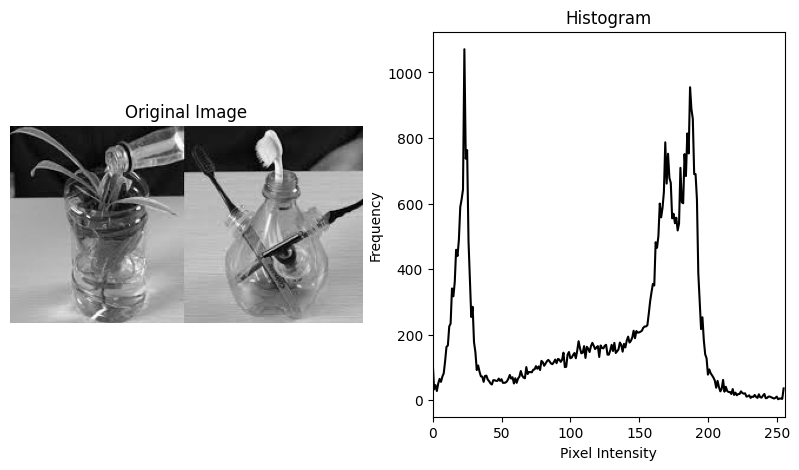

In [13]:
histogram , bins = np.histogram(img.flatten(),256,[0,256])

# Plot histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(histogram, color='black')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.show()

# Histogram Equalization

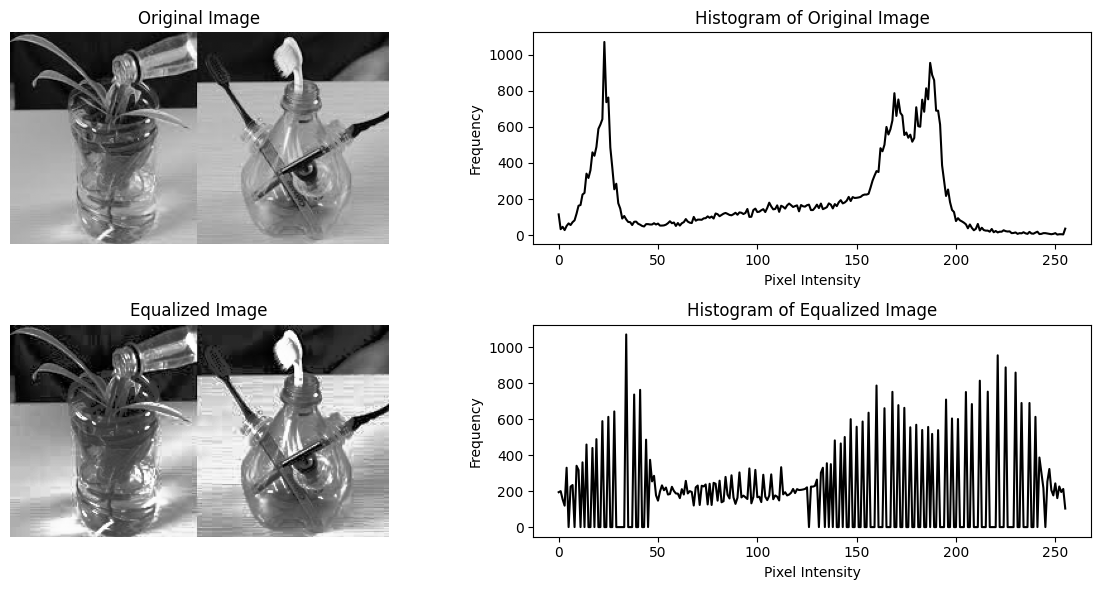

In [14]:

# Apply Histogram Equalization
equalized_img7 = cv2.equalizeHist(img)

# Compute histograms
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_img7], [0], None, [256], [0, 256])

# Plot original and equalized images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original Image
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_img7, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Histogram of Equalized Image
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Clahe

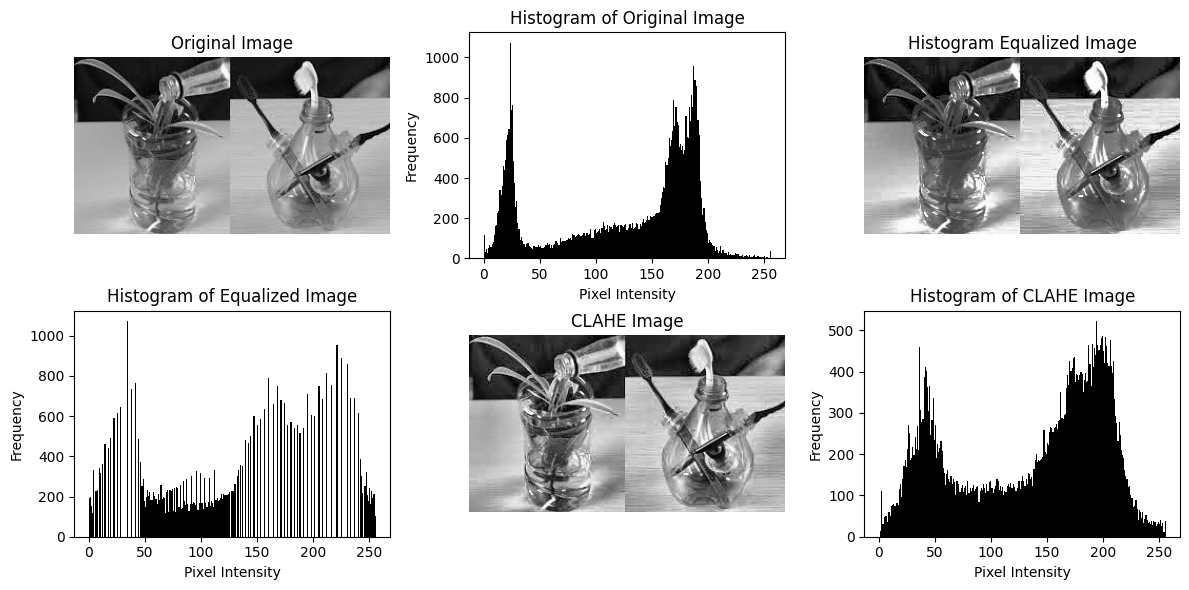

In [15]:
# Apply Histogram Equalization (HE)
equalized_img = cv2.equalizeHist(img)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Atur parameter
clahe_img = clahe.apply(img)

# Plot images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original Image
plt.subplot(2, 3, 2)
plt.hist(img.ravel(), 256, [0, 256], color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram Equalized Image
plt.subplot(2, 3, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

# Histogram of Equalized Image
plt.subplot(2, 3, 4)
plt.hist(equalized_img.ravel(), 256, [0, 256], color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# CLAHE Image
plt.subplot(2, 3, 5)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE Image")
plt.axis('off')

# Histogram of CLAHE Image
plt.subplot(2, 3, 6)
plt.hist(clahe_img.ravel(), 256, [0, 256], color='black')
plt.title("Histogram of CLAHE Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()